In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset
from surprise.model_selection import cross_validate
plt.style.use('ggplot')


In [77]:
data = Dataset.load_builtin('ml-100k')

# Data exploration 

In [78]:
raw_ratings = data.raw_ratings

df = pd.DataFrame(raw_ratings, columns=['userID', 'itemID', 'rating', 'timestamp'])
df

,userID,itemID,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


Distribution of Ratings

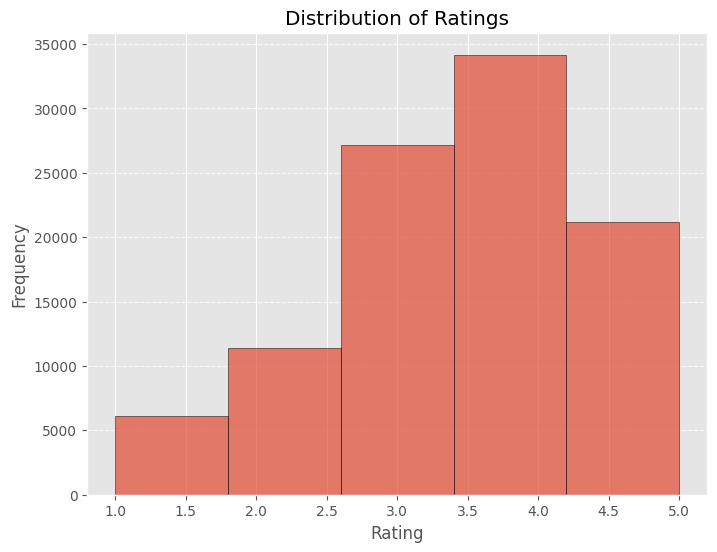

In [79]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

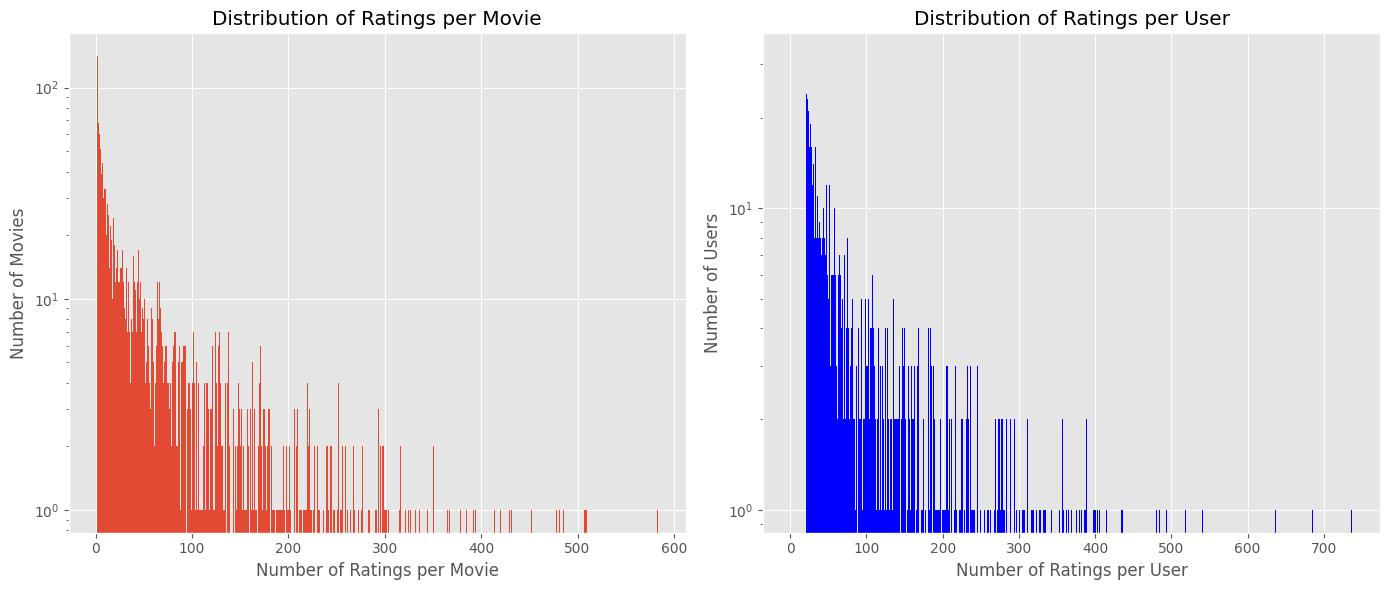

In [80]:
rating_count = df['itemID'].value_counts()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(rating_count, bins=range(1, rating_count.max() + 1), log=True)
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Number of Movies')
plt.title('Distribution of Ratings per Movie')
plt.grid(True)

user_rating_count = df['userID'].value_counts()
plt.subplot(1, 2, 2)
plt.hist(user_rating_count, bins=range(1, user_rating_count.max() + 1), log=True, color="blue")
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Ratings per User')
plt.grid(True)
plt.tight_layout()
plt.show()

Sparcity of User-Item matrix

In [81]:
sparsity = 1 - len(df) / (df["userID"].unique().shape[0] * df["itemID"].unique().shape[0])
sparsity

0.9369533063577546

# Recommender System Model

In [82]:
from surprise import BaselineOnly, KNNBasic, KNNWithMeans, KNNBaseline, SVD, SVDpp, NMF, SlopeOne, CoClustering

In [83]:
algo = BaselineOnly()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9378  0.9467  0.9557  0.9434  0.9351  0.9437  0.0073  
MAE (testset)     0.7453  0.7506  0.7590  0.7476  0.7395  0.7484  0.0064  
Fit time          0.14    0.14    0.17    0.15    0.16    0.15    0.01    
Test time         0.05    0.27    0.05    0.05    0.05    0.09    0.09    


In [84]:
algo = KNNBasic()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9838  0.9720  0.9752  0.9820  0.9818  0.9790  0.0045  
MAE (testset)     0.7751  0.7692  0.7696  0.7760  0.7752  0.7730  0.0030  
Fit time          0.24    0.28    0.28    0.28    0.30    0.28    0.02    
Test time         2.11    1.99    2.00    2.03    1.96    2.02    0.05    


In [85]:
algo = KNNWithMeans()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9541  0.9457  0.9548  0.9429  0.9544  0.9504  0.0050  
MAE (testset)     0.7520  0.7436  0.7528  0.7449  0.7493  0.7485  0.0037  
Fit time          0.29    0.35    0.31    0.33    0.30    0.32    0.02    
Test time         2.23    2.16    2.19    2.07    2.25    2.18    0.06    


In [86]:
algo = KNNBaseline()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9288  0.9325  0.9251  0.9339  0.9333  0.9307  0.0033  
MAE (testset)     0.7296  0.7347  0.7293  0.7362  0.7348  0.7329  0.0029  
Fit time          0.37    0.40    0.40    0.47    0.40    0.41    0.04    
Test time         2.24    2.25    2.30    2.30    2.42    2.30    0.07    


In [87]:
algo = SVD()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9425  0.9325  0.9368  0.9377  0.9370  0.9373  0.0032  
MAE (testset)     0.7451  0.7352  0.7367  0.7388  0.7380  0.7388  0.0034  
Fit time          0.75    0.78    0.81    0.77    0.77    0.78    0.02    
Test time         0.08    0.09    0.08    0.20    0.08    0.11    0.05    


In [94]:
algo = SVDpp()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9274  0.9166  0.9172  0.9216  0.9114  0.9189  0.0053  
MAE (testset)     0.7255  0.7178  0.7184  0.7221  0.7160  0.7200  0.0034  
Fit time          24.84   25.20   25.45   25.59   25.51   25.32   0.28    
Test time         3.07    2.98    3.20    3.08    3.06    3.08    0.07    


In [89]:
algo = NMF()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9585  0.9629  0.9590  0.9597  0.9752  0.9631  0.0062  
MAE (testset)     0.7571  0.7571  0.7522  0.7545  0.7639  0.7570  0.0039  
Fit time          1.29    1.26    1.24    1.29    1.32    1.28    0.03    
Test time         0.07    0.07    0.19    0.07    0.08    0.10    0.05    


In [90]:
algo = SlopeOne()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9417  0.9571  0.9468  0.9394  0.9367  0.9443  0.0072  
MAE (testset)     0.7400  0.7517  0.7441  0.7383  0.7383  0.7425  0.0051  
Fit time          0.52    0.63    0.58    0.58    0.58    0.58    0.03    
Test time         1.72    1.95    1.79    1.80    1.79    1.81    0.07    


In [91]:
algo = CoClustering()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9586  0.9693  0.9513  0.9637  0.9793  0.9645  0.0095  
MAE (testset)     0.7502  0.7603  0.7439  0.7555  0.7654  0.7551  0.0075  
Fit time          1.40    1.42    1.46    1.38    1.40    1.41    0.03    
Test time         0.19    0.07    0.07    0.07    0.19    0.12    0.06    
